In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
import plotly.graph_objs as go
import plotly.offline as py

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel("Superstore.xlsx")

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,US,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,US,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,US,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,US,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,US,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.shape

(9994, 21)

In [5]:
data.drop(columns=['Row ID'],inplace=True)

In [6]:
data.drop(columns=['Order ID'],inplace=True)

In [7]:
data.drop(columns=['Postal Code'], inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     9994 non-null   datetime64[ns]
 1   Ship Date      9994 non-null   datetime64[ns]
 2   Ship Mode      9994 non-null   object        
 3   Customer ID    9994 non-null   object        
 4   Customer Name  9994 non-null   object        
 5   Segment        9994 non-null   object        
 6   Country        9994 non-null   object        
 7   City           9994 non-null   object        
 8   State          9994 non-null   object        
 9   Region         9994 non-null   object        
 10  Product ID     9994 non-null   object        
 11  Category       9994 non-null   object        
 12  Sub-Category   9994 non-null   object        
 13  Product Name   9994 non-null   object        
 14  Sales          9994 non-null   float64       
 15  Quantity       9994 n

In [9]:
data['order year']=pd.DatetimeIndex(data['Order Date']).year

In [10]:
data['order year'].unique()

array([2018, 2017, 2016, 2019], dtype=int64)

In [11]:
data['Product Name'].unique()

array(['Bush Somerset Collection Bookcase',
       'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back',
       'Self-Adhesive Address Labels for Typewriters by Universal', ...,
       'Eureka Hand Vacuum, Bagless', 'LG G2',
       'Eldon Jumbo ProFile Portable File Boxes Graphite/Black'],
      dtype=object)

# Total Unique value

In [12]:
data.nunique()

Order Date       1236
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
order year          4
dtype: int64

# Total Missing values

In [13]:
data.isnull().sum()

Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
order year       0
dtype: int64

# Exploratory Data Analysis

# Univariate Analysis

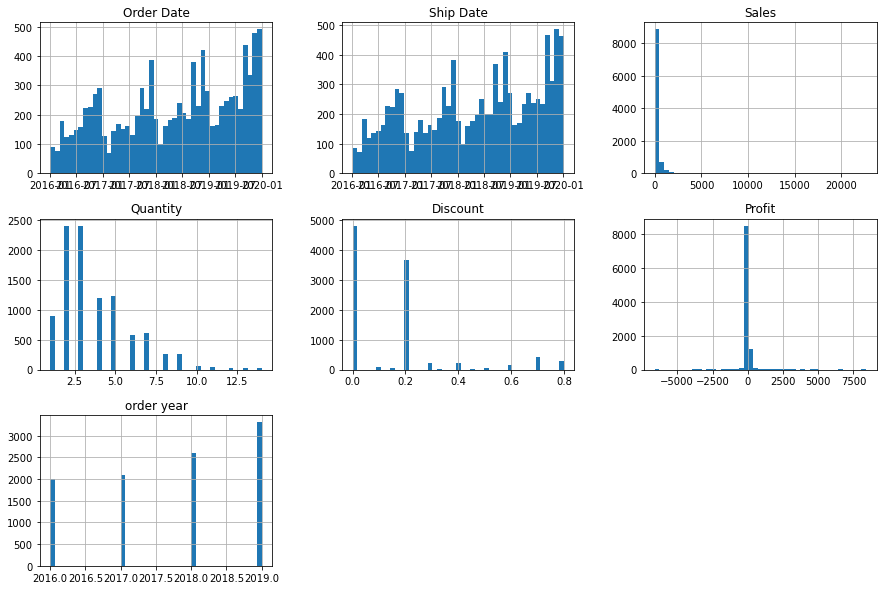

In [14]:
data.hist(bins = 45, figsize = (15,10))
plt.show()

In [15]:
summary=data.describe()
summary

,Sales,Quantity,Discount,Profit,order year
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896,2017.722233
std,623.245101,2.225110,0.206452,234.260108,1.123555
min,0.444000,1.000000,0.000000,-6599.978000,2016.000000
25%,17.280000,2.000000,0.000000,1.728750,2017.000000
50%,54.490000,3.000000,0.200000,8.666500,2018.000000
75%,209.940000,5.000000,0.200000,29.364000,2019.000000
max,22638.480000,14.000000,0.800000,8399.976000,2019.000000


* here we clearly see that in summary statistics the mean value is not equal to the median(i.e 50%) hence the data does not follow the normality

# For variable Sales

<AxesSubplot:xlabel='Sales'>

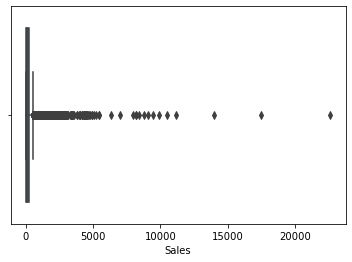

In [16]:
sns.boxplot(data['Sales'])

# For variable Quantity

<AxesSubplot:xlabel='Quantity'>

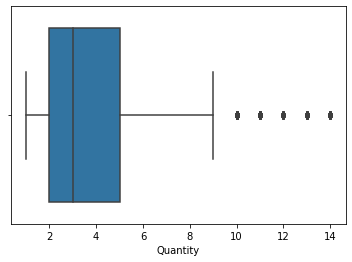

In [17]:
sns.boxplot(data['Quantity'])

# For variable Profit

<AxesSubplot:xlabel='Profit'>

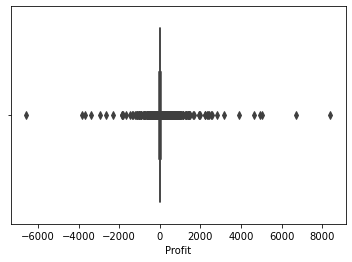

In [18]:
sns.boxplot(data['Profit'])

# For variable Discount

<AxesSubplot:xlabel='Discount'>

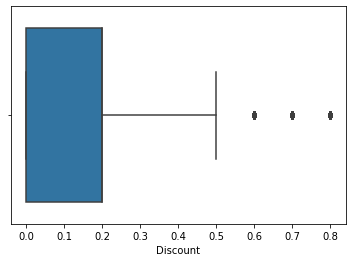

In [19]:
sns.boxplot(data['Discount'])

<AxesSubplot:xlabel='Segment', ylabel='count'>

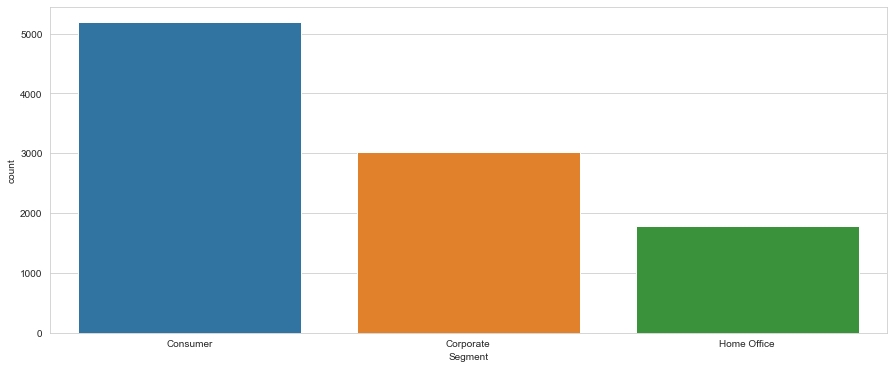

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,6))
sns.countplot(x = 'Segment', data = data)

<AxesSubplot:xlabel='Category', ylabel='count'>

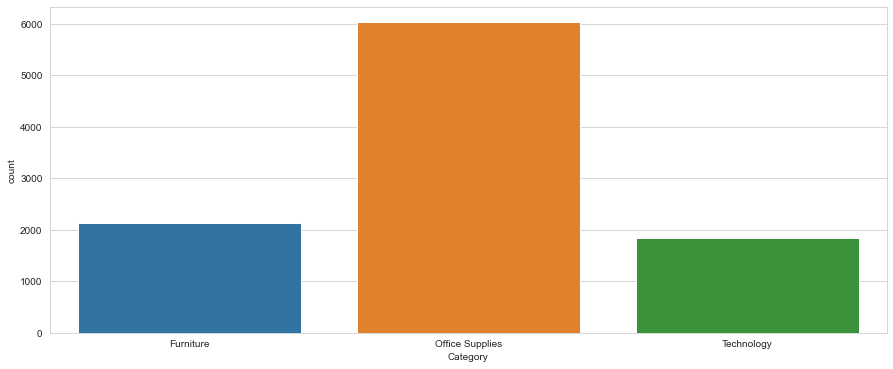

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,6))
sns.countplot(x = 'Category', data = data)

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

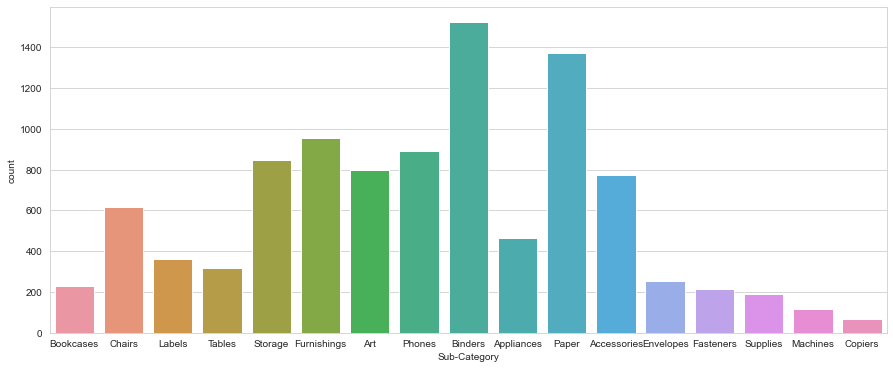

In [22]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,6))
sns.countplot(x = 'Sub-Category', data = data)

# Bivariate Analysis

Category
Furniture          349.834887
Office Supplies    119.324101
Technology         452.709276
Name: Sales, dtype: float64

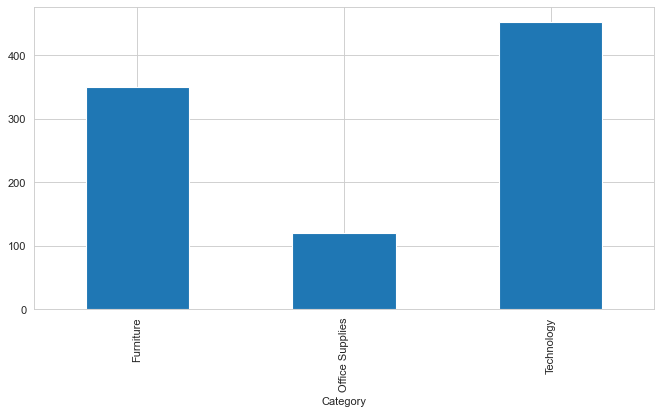

In [23]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Category',)['Sales'].mean().plot(kind='bar')
data.groupby('Category')['Sales'].mean()

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64

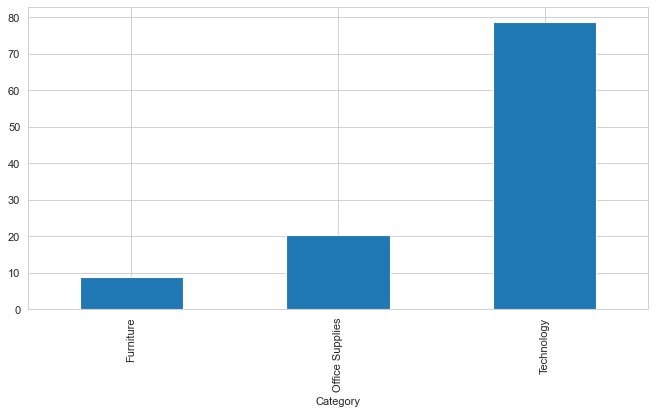

In [24]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Category',)['Profit'].mean().plot(kind='bar')
data.groupby('Category')['Profit'].mean()

Category
Furniture          0.173923
Office Supplies    0.157285
Technology         0.132323
Name: Discount, dtype: float64

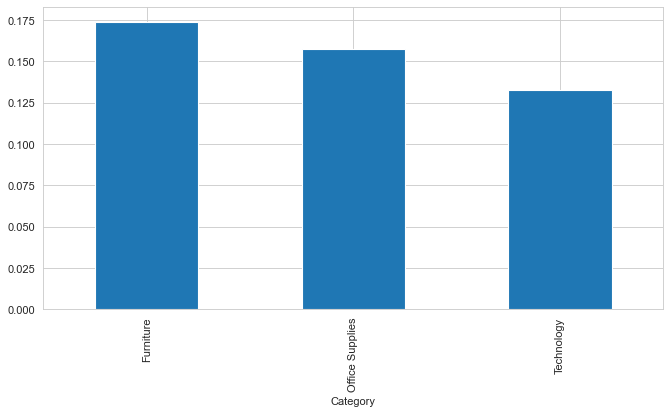

In [25]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Category',)['Discount'].mean().plot(kind='bar')
data.groupby('Category')['Discount'].mean()

Category
Furniture          3.785007
Office Supplies    3.801195
Technology         3.756903
Name: Quantity, dtype: float64

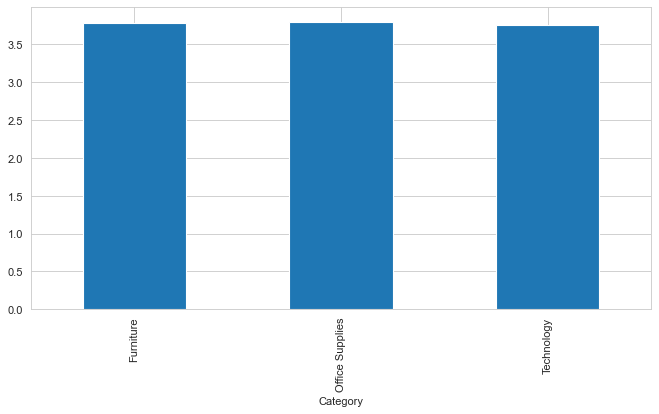

In [26]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Category',)['Quantity'].mean().plot(kind='bar')
data.groupby('Category')['Quantity'].mean()

Segment
Consumer       223.733644
Corporate      233.823300
Home Office    240.972041
Name: Sales, dtype: float64

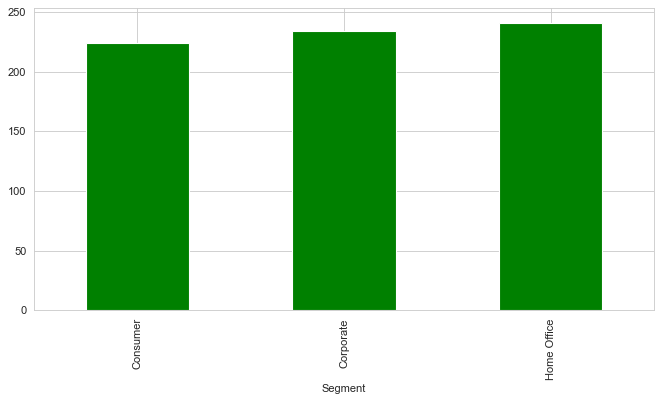

In [27]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Segment',)['Sales'].mean().plot(kind='bar',color='green')
data.groupby('Segment')['Sales'].mean()

Segment
Consumer       3.760547
Corporate      3.843709
Home Office    3.782389
Name: Quantity, dtype: float64

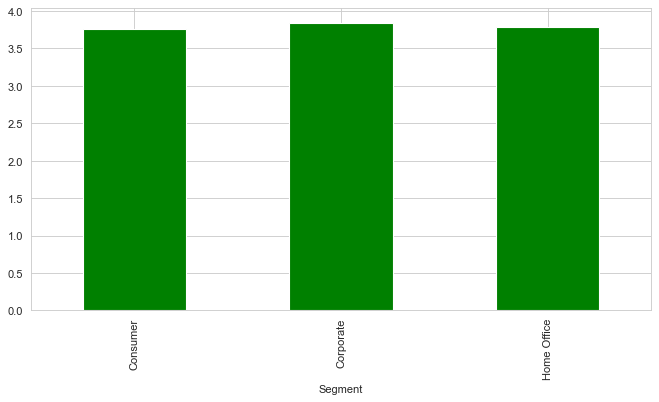

In [28]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Segment',)['Quantity'].mean().plot(kind='bar',color='green')
data.groupby('Segment')['Quantity'].mean()

Segment
Consumer       25.836873
Corporate      30.456667
Home Office    33.818664
Name: Profit, dtype: float64

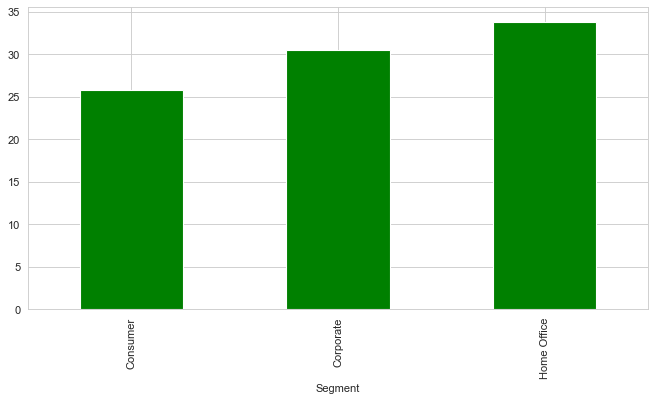

In [29]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Segment',)['Profit'].mean().plot(kind='bar',color='green')
data.groupby('Segment')['Profit'].mean()

Segment
Consumer       0.158141
Corporate      0.158228
Home Office    0.147128
Name: Discount, dtype: float64

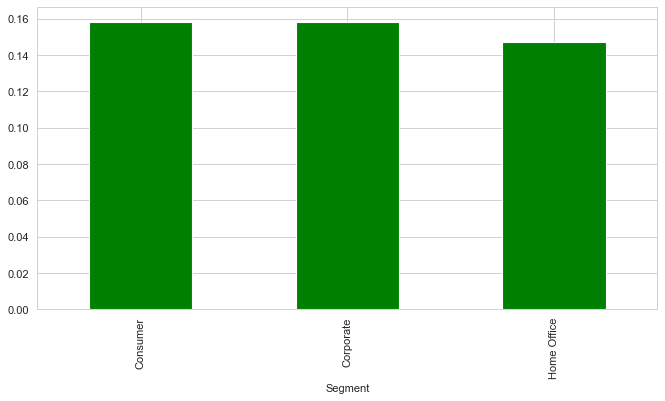

In [30]:
plt.figure(figsize=[10,5],dpi=80)
data.groupby('Segment',)['Discount'].mean().plot(kind='bar',color='green')
data.groupby('Segment')['Discount'].mean()

Sub-Category
Accessories     215.974604
Appliances      230.755710
Art              34.068834
Binders         133.560560
Bookcases       503.859633
Chairs          532.332420
Copiers        2198.941618
Envelopes        64.867724
Fasteners        13.936774
Furnishings      95.825668
Labels           34.303055
Machines       1645.553313
Paper            57.284092
Phones          371.211534
Storage         264.590553
Supplies        245.650200
Tables          648.794771
Name: Sales, dtype: float64

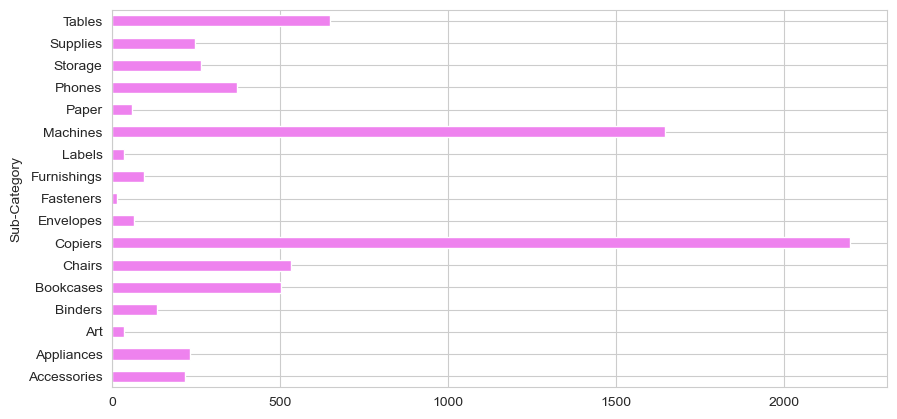

In [31]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('Sub-Category')['Sales'].mean().plot(kind='barh',color='violet')
data.groupby('Sub-Category')['Sales'].mean()

Sub-Category
Accessories    3.840000
Appliances     3.710300
Art            3.768844
Binders        3.922521
Bookcases      3.807018
Chairs         3.818476
Copiers        3.441176
Envelopes      3.566929
Fasteners      4.211982
Furnishings    3.723093
Labels         3.846154
Machines       3.826087
Paper          3.779562
Phones         3.699663
Storage        3.732861
Supplies       3.405263
Tables         3.890282
Name: Quantity, dtype: float64

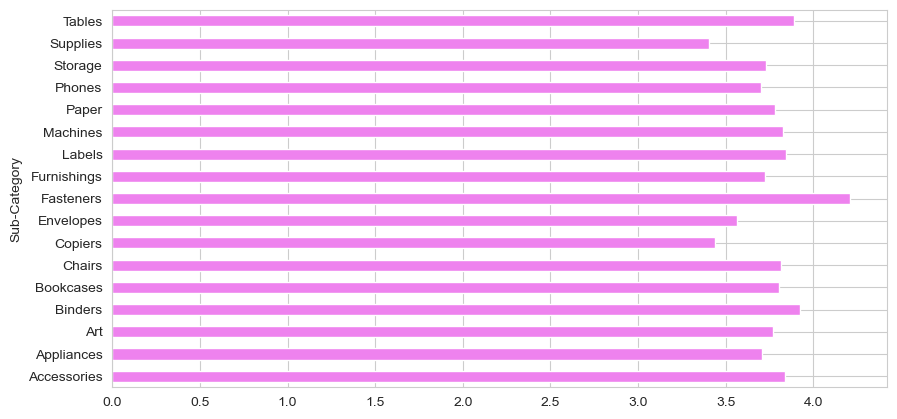

In [32]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('Sub-Category')['Quantity'].mean().plot(kind='barh',color='violet')
data.groupby('Sub-Category')['Quantity'].mean()

Sub-Category
Accessories     54.111788
Appliances      38.922758
Art              8.200737
Binders         19.843574
Bookcases      -15.230509
Chairs          43.095894
Copiers        817.909190
Envelopes       27.418019
Fasteners        4.375660
Furnishings     13.645918
Labels          15.236962
Machines        29.432669
Paper           24.856620
Phones          50.073938
Storage         25.152277
Supplies        -6.258418
Tables         -55.565771
Name: Profit, dtype: float64

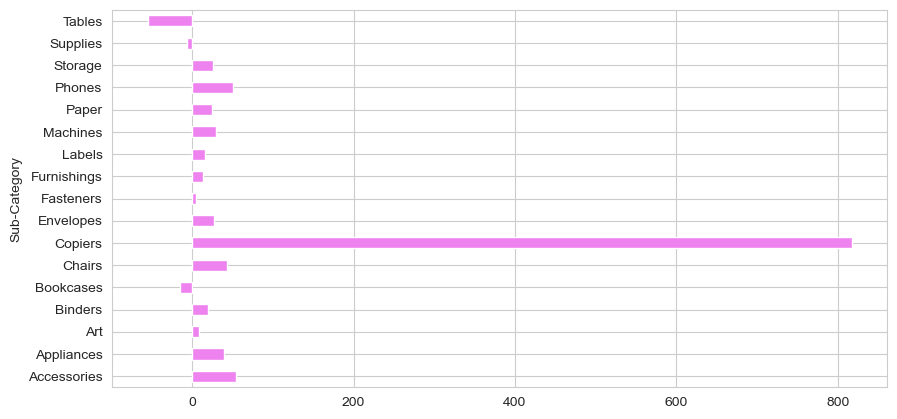

In [33]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('Sub-Category')['Profit'].mean().plot(kind='barh',color='violet')
data.groupby('Sub-Category')['Profit'].mean()

Sub-Category
Accessories    0.078452
Appliances     0.166524
Art            0.074874
Binders        0.372292
Bookcases      0.211140
Chairs         0.170178
Copiers        0.161765
Envelopes      0.080315
Fasteners      0.082028
Furnishings    0.138349
Labels         0.068681
Machines       0.306087
Paper          0.074891
Phones         0.154556
Storage        0.074704
Supplies       0.076842
Tables         0.261285
Name: Discount, dtype: float64

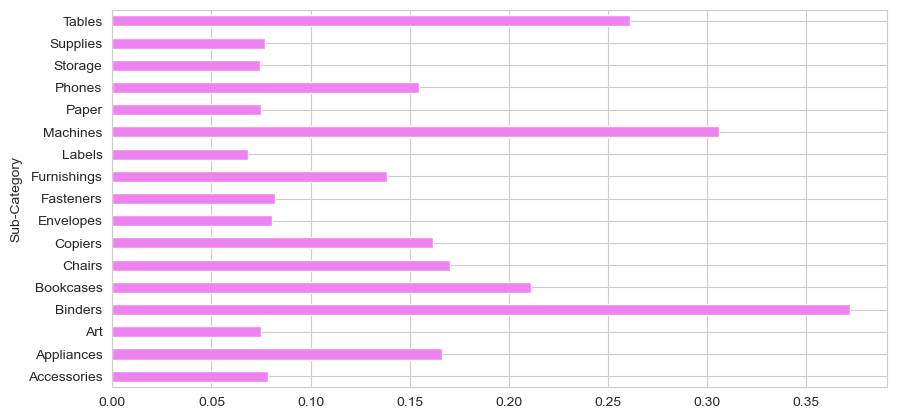

In [34]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('Sub-Category')['Discount'].mean().plot(kind='barh',color='violet')
data.groupby('Sub-Category')['Discount'].mean()

Text(0.5, 0, 'Sales')

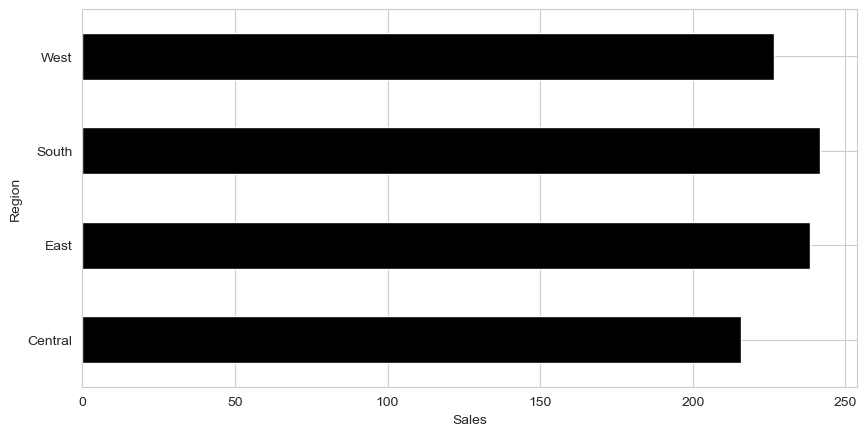

In [35]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('Region')['Sales'].mean().plot(kind='barh',color='black')
data.groupby('Region')['Sales'].mean()
plt.xlabel('Sales')

Region
Central    3.779595
East       3.728230
South      3.832716
West       3.829535
Name: Quantity, dtype: float64

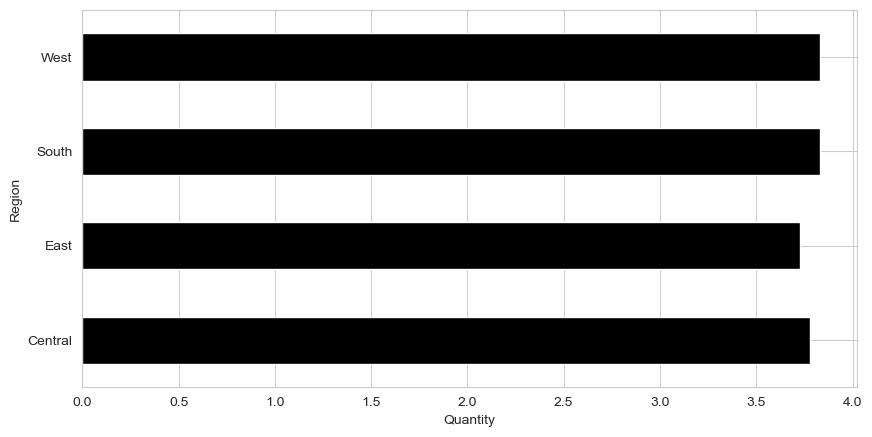

In [36]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('Region')['Quantity'].mean().plot(kind='barh',color='black')
plt.xlabel('Quantity')
data.groupby('Region')['Quantity'].mean()


Region
Central    0.240353
East       0.145365
South      0.147253
West       0.109335
Name: Discount, dtype: float64

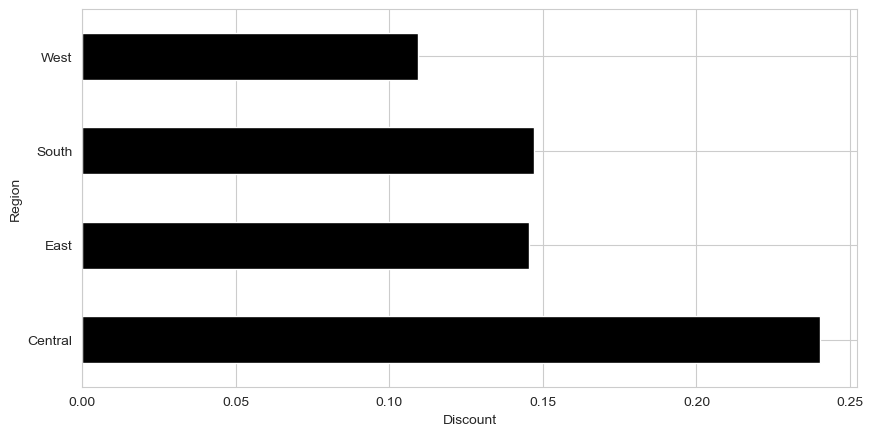

In [37]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('Region')['Discount'].mean().plot(kind='barh',color='black')
plt.xlabel('Discount')
data.groupby('Region')['Discount'].mean()

Region
Central    17.092709
East       32.135808
South      28.857673
West       33.849032
Name: Profit, dtype: float64

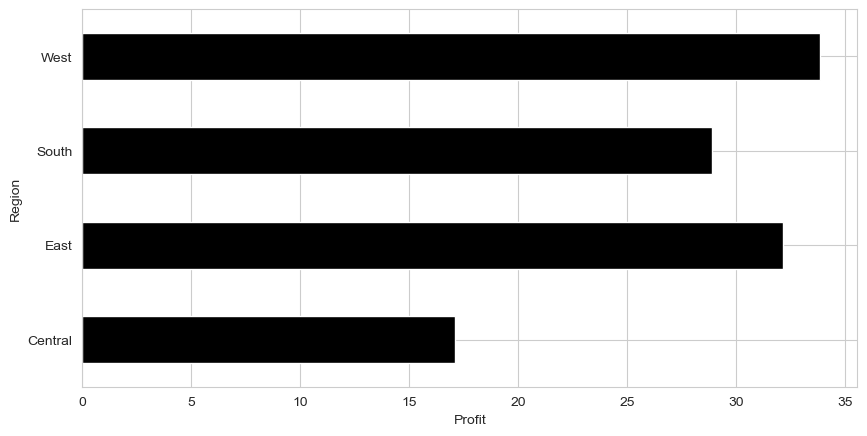

In [38]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('Region')['Profit'].mean().plot(kind='barh',color='black')
plt.xlabel('Profit')
data.groupby('Region')['Profit'].mean()

Text(0.5, 0, 'Sales')

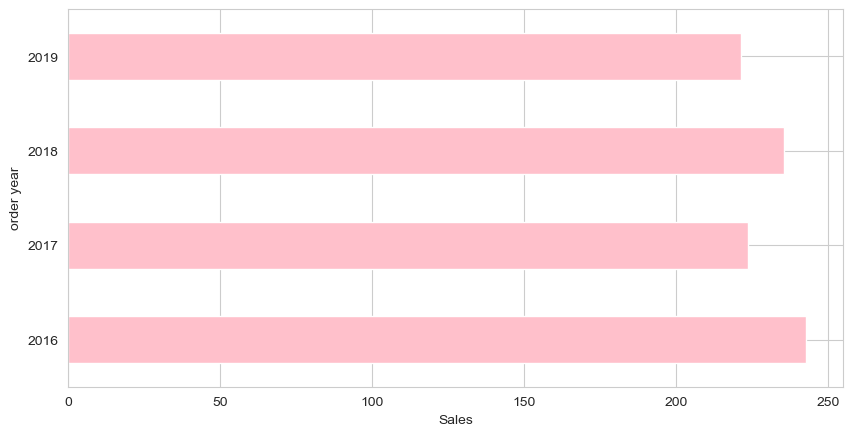

In [39]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('order year')['Sales'].mean().plot(kind='barh',color='pink')
data.groupby('order year')['Sales'].mean()
plt.xlabel('Sales')

order year
2016    24.858994
2017    29.314274
2018    31.617771
2019    28.212340
Name: Profit, dtype: float64

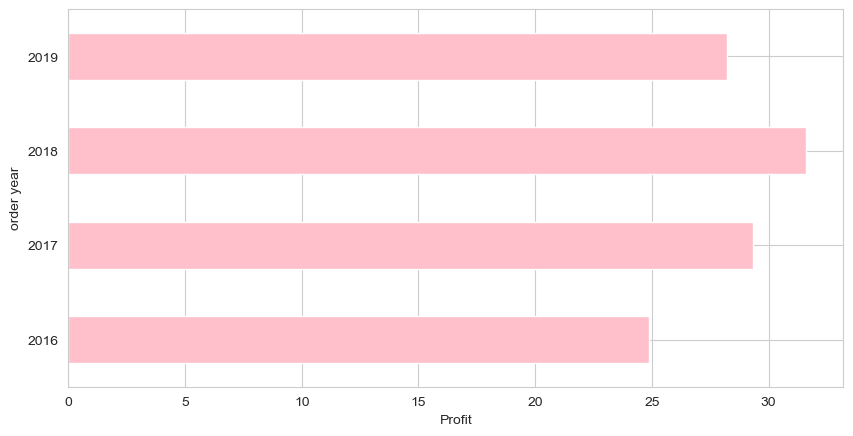

In [40]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('order year')['Profit'].mean().plot(kind='barh',color='pink')
plt.xlabel('Profit')
data.groupby('order year')['Profit'].mean()


order year
2016    3.803813
2017    3.795909
2018    3.802474
2019    3.766908
Name: Quantity, dtype: float64

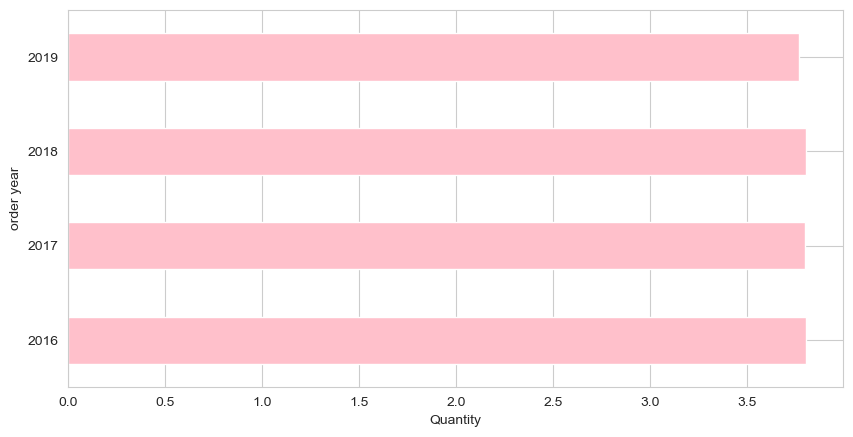

In [41]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('order year')['Quantity'].mean().plot(kind='barh',color='pink')
plt.xlabel('Quantity')
data.groupby('order year')['Quantity'].mean()


order year
2016    0.158284
2017    0.155609
2018    0.154743
2019    0.156467
Name: Discount, dtype: float64

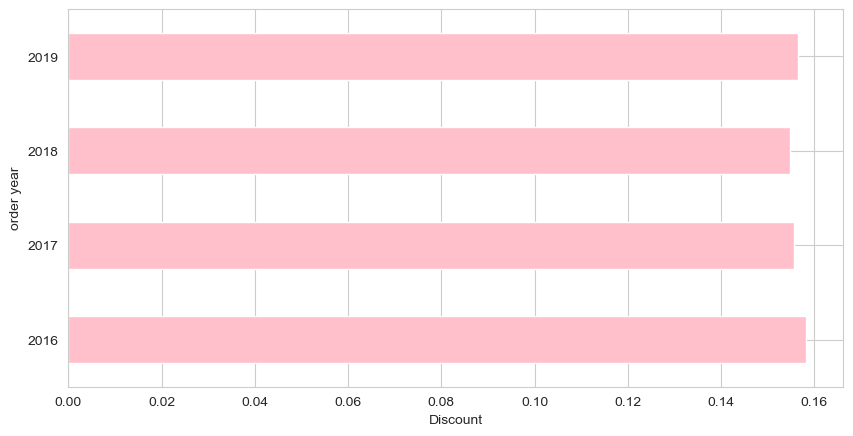

In [42]:
plt.figure(figsize=[10,5],dpi=100)
data.groupby('order year')['Discount'].mean().plot(kind='barh',color='pink')
plt.xlabel('Discount')
data.groupby('order year')['Discount'].mean()

# Multivariate Analysis:

# For category

<AxesSubplot:xlabel='Sales', ylabel='Category'>

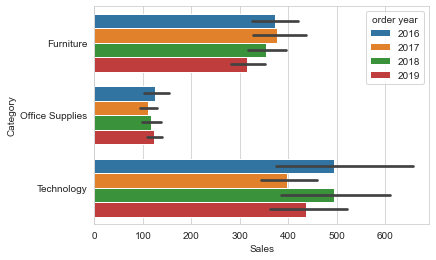

In [43]:
sns.barplot(x='Sales',y='Category',hue='order year',data=data)

<AxesSubplot:xlabel='Profit', ylabel='Category'>

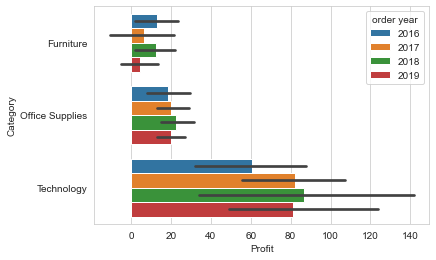

In [44]:
sns.barplot(x='Profit',y='Category',hue='order year',data=data)

<AxesSubplot:xlabel='Discount', ylabel='Category'>

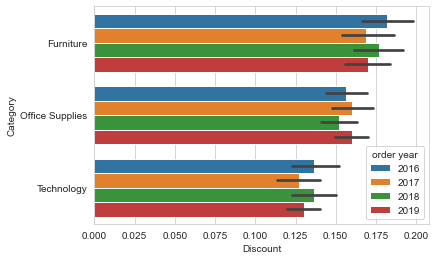

In [45]:
sns.barplot(x='Discount',y='Category',hue='order year',data=data)

<AxesSubplot:xlabel='Quantity', ylabel='Category'>

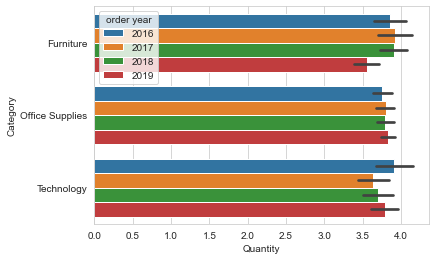

In [46]:
sns.barplot(x='Quantity',y='Category',hue='order year',data=data)

# For Sub-Category

<AxesSubplot:xlabel='Sales', ylabel='Sub-Category'>

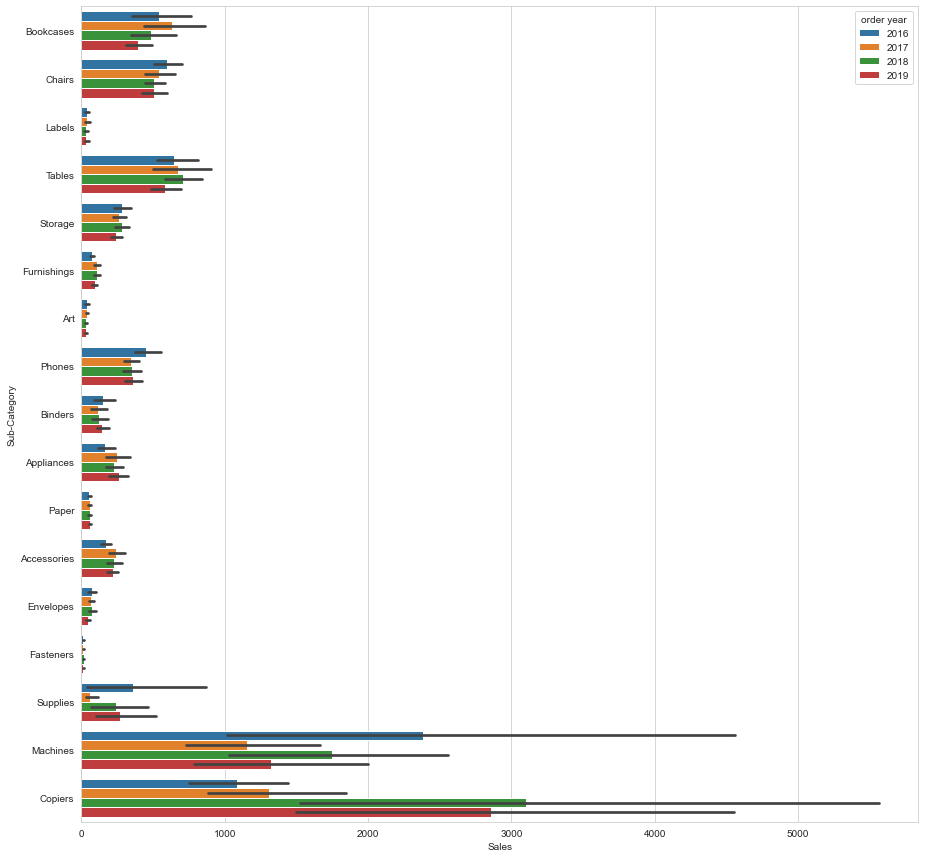

In [47]:
plt.figure(figsize=(15,15))
sns.barplot(x='Sales',y='Sub-Category',hue='order year',data=data)

<AxesSubplot:xlabel='Profit', ylabel='Sub-Category'>

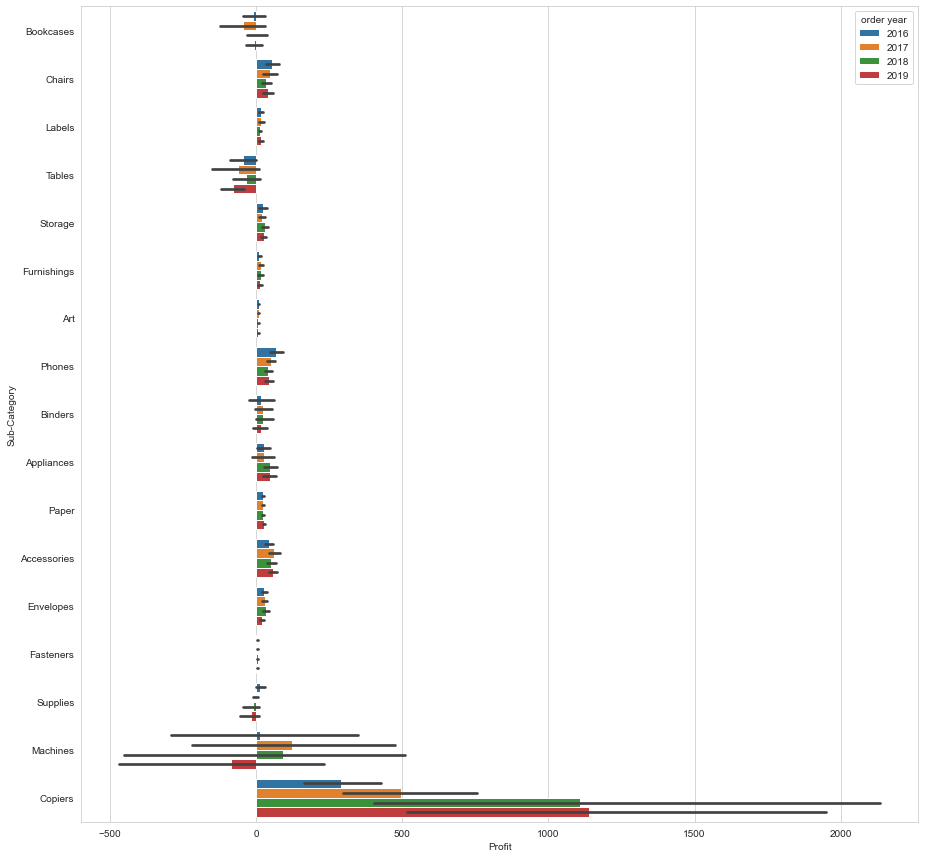

In [48]:
plt.figure(figsize=(15,15))
sns.barplot(x='Profit',y='Sub-Category',hue='order year',data=data)

<AxesSubplot:xlabel='Discount', ylabel='Sub-Category'>

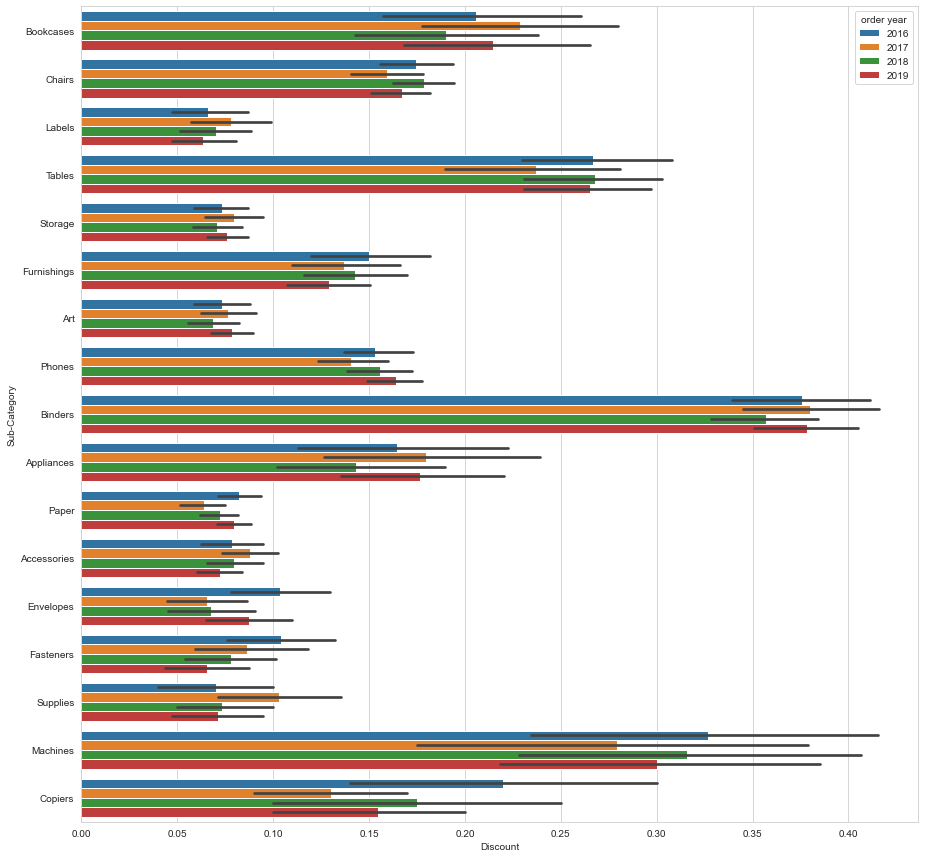

In [49]:
plt.figure(figsize=(15,15))
sns.barplot(x='Discount',y='Sub-Category',hue='order year',data=data)

<AxesSubplot:xlabel='Quantity', ylabel='Sub-Category'>

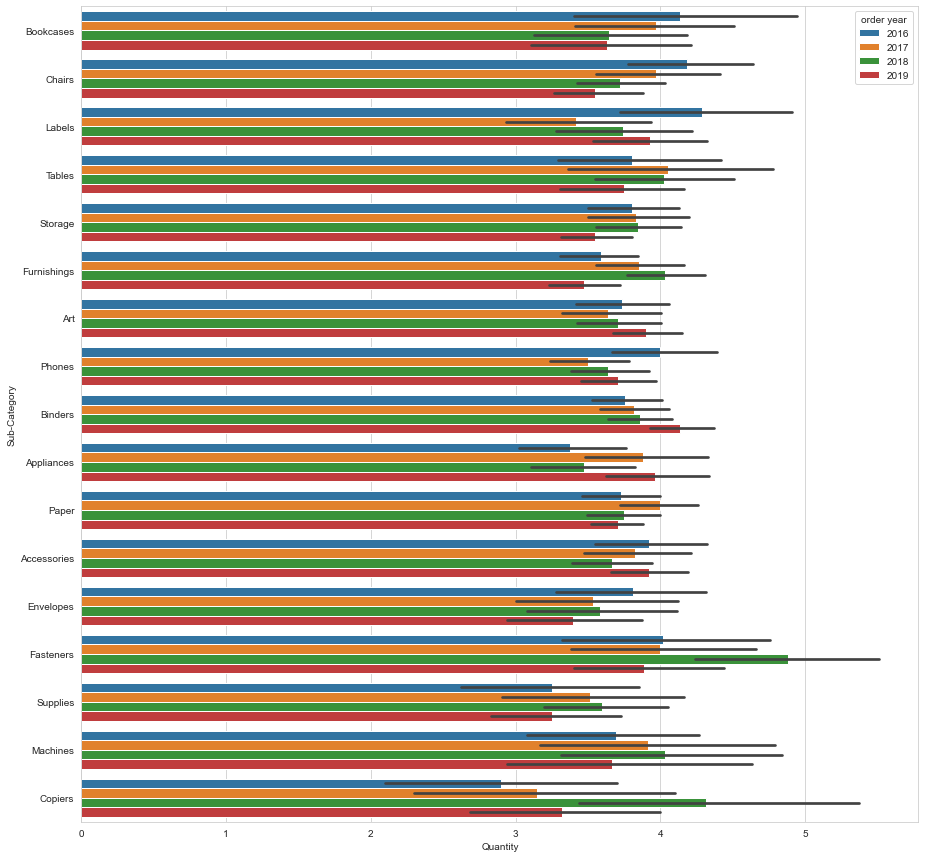

In [50]:
plt.figure(figsize=(15,15))
sns.barplot(x='Quantity',y='Sub-Category',hue='order year',data=data)

# Correlation:

In [51]:
cor=data.corr()

<AxesSubplot:>

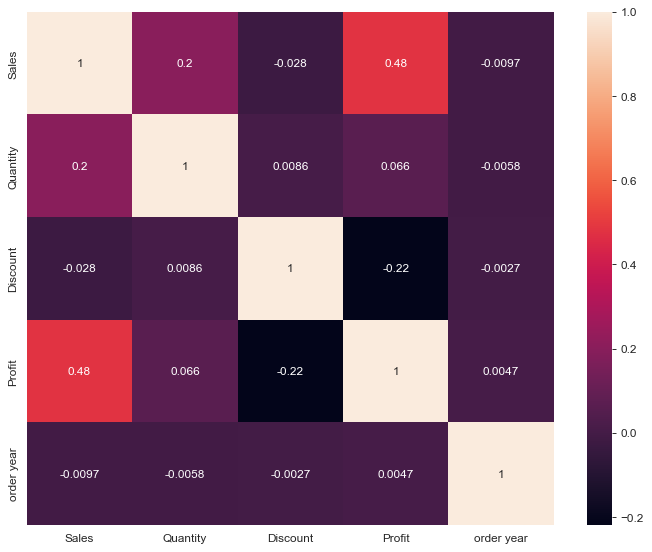

In [63]:
plt.figure(figsize=[10,8],dpi=85)
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)

* On correlation we see that variable sales and profit have strong positive correlation hence the sales of the product increases then it’s profit also increases.
And variable Discount and Profit have strong negative correlation hence as the discount increases profit is decreases.


# ANOVA

Statistical way to compute relationship between a categorical and numerical variable

the method of finding out whether a categorical variable is having an impact on the numerical variable 



In [53]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [54]:
model=ols('Sales~Category',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
Category,1.958817e+08,2.0,265.489768,4.557526e-113
Residual,3.685744e+09,9991.0,NaN,NaN


* Here p-value<= 0.05 means Variable category does  not have an impact on sales

In [55]:
model=ols('Sales~Segment',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
Segment,4.624275e+05,2.0,0.595197,0.551473
Residual,3.881163e+09,9991.0,NaN,NaN


* here p-value >= 0.05 meansVariable segment does have impact on sales

In [56]:
model=ols('Profit~Segment',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
Segment,9.856987e+04,2.0,0.898067,0.407389
Residual,5.482953e+08,9991.0,NaN,NaN


* Here p-value>=0.05 means variable segment does have impact on the Profit

In [57]:
model=ols('Profit~Category',data=data).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
Category,5.898009e+06,2.0,54.311023,3.469918e-24
Residual,5.424958e+08,9991.0,NaN,NaN


* Here p-value =< 0.05 means variable category does not have an impact on the profit

# Distribution plot:

<AxesSubplot:xlabel='Sales', ylabel='Density'>

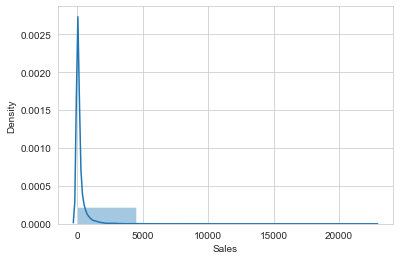

In [58]:
sns.distplot(data['Sales'], bins=5)

<AxesSubplot:xlabel='Quantity', ylabel='Density'>

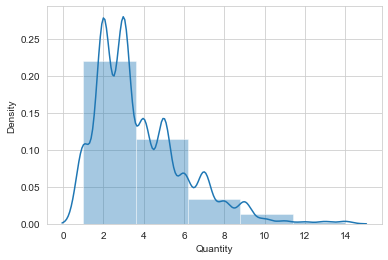

In [59]:
sns.distplot(data['Quantity'], bins=5)

<AxesSubplot:xlabel='Profit', ylabel='Density'>

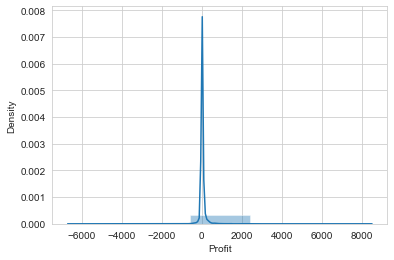

In [60]:
sns.distplot(data['Profit'], bins=5)

<AxesSubplot:xlabel='Discount', ylabel='Density'>

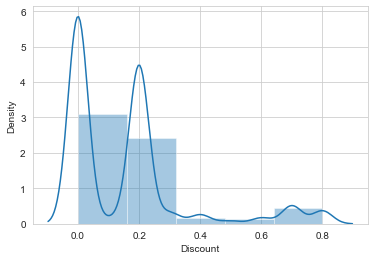

In [61]:
sns.distplot(data['Discount'], bins=5)